In [1]:
# ==========================================
# 各種ライブラリと CSV データの読み込み
# ==========================================
# 自動リロードを有効にする設定
%load_ext autoreload
%autoreload 2

# 必要なライブラリのインストール
%pip install pycountry
%pip install matplotlib
%pip install nltk

# ライブラリのインポート
import numpy as np  # 線形代数
import pandas as pd  # データ処理、CSVファイルのI/O（例：pd.read_csv）
import matplotlib.pyplot as plt
from collections import Counter

# 独自モジュールのインポート
from modules.preprocessor import Preprocessor

# CSVデータを pandas データフレームオブジェクトとして読み込み
df = pd.read_csv("../input/nlp-getting-started/train.csv")
df = df.fillna("")  # 空のカラムを空文字に置換

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Keyword Counts:
                   keyword  count
0                              61
1               fatalities     45
2                   deluge     42
3               armageddon     42
4                   damage     41
..                     ...    ...
217          forest%20fire     19
218              epicentre     12
219                 threat     11
220             inundation     10
221  radiation%20emergency      9

[222 rows x 2 columns]


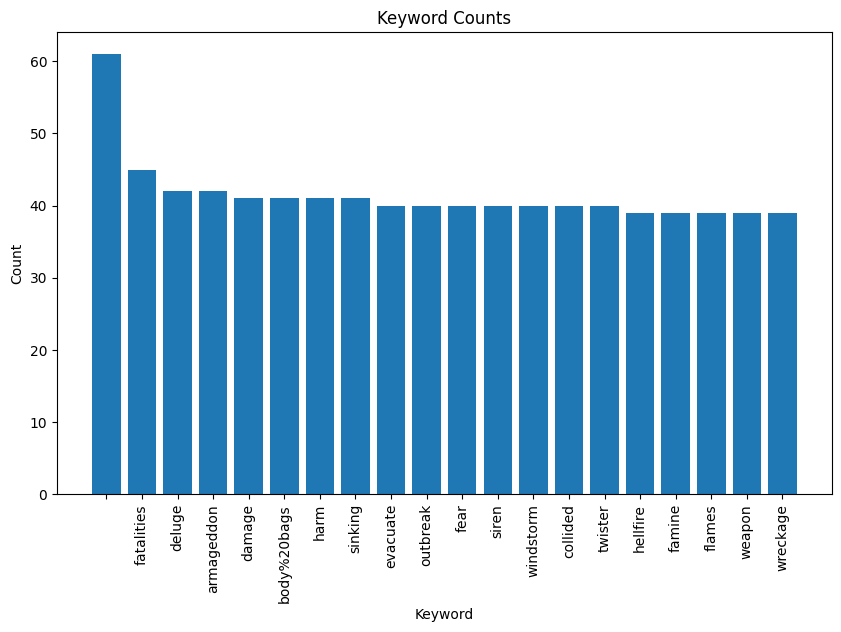

In [2]:
# ==========================================
# EDA (探索的データ解析) 前処理前
# ==========================================
# keyword カラムの登場回数をカウント、表にまとめる
keyword_counts = df["keyword"].value_counts().reset_index()
keyword_counts.columns = ["keyword", "count"]
print("Keyword Counts:")
print(keyword_counts)

# 出現回数上位20件を取得
top_n = 20

# 棒グラフで可視化
plt.figure(figsize=(10, 6))
plt.bar(keyword_counts["keyword"][:top_n], keyword_counts["count"][:top_n])
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.title("Keyword Counts")
plt.xticks(rotation=90)
plt.show()

In [5]:
# ==========================================
# 前処理 > データクリーニング（Data Cleaning）
# ==========================================
# 元データをコピーして、特徴量とターゲットに分割
X_raw = df[["text", "keyword", "location"]].copy()
y = df["target"].copy()  # ターゲット変数

# "text" カラムと "location" カラムのデータクリーニング
X_processed = X_raw.copy()
X_processed["text"] = Preprocessor.normalize_text(X_raw["text"])
X_processed["keyword"] = Preprocessor.normalize_keyword(X_raw["keyword"])
X_processed["location"] = Preprocessor.normalize_location(X_raw["location"])

Word Counts After Processing:
              word  count
0          URLTEXT   4711
1             like    345
2               up    321
3             just    317
4             fire    250
...            ...    ...
14577          nsa      1
14578  hyiderghost      1
14579  fighterdena      1
14580     startrek      1
14581   atåêcinema      1

[14582 rows x 2 columns]


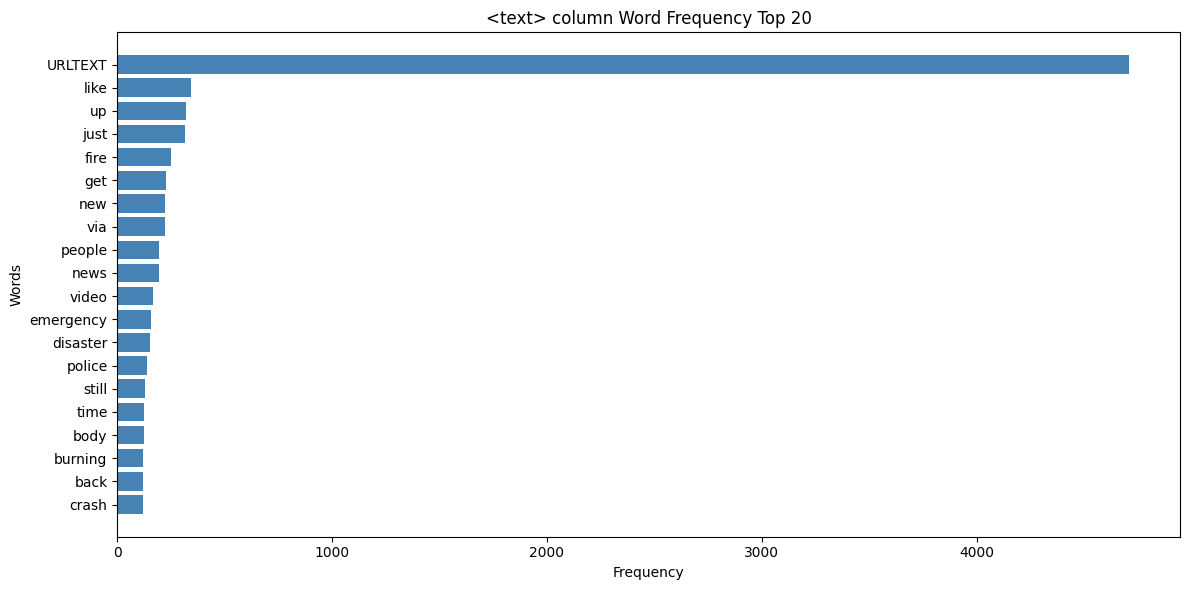

Keyword Counts After Processing:
          keyword  count
0           fatal    120
1          derail    112
2           evacu    112
3           flood    109
4        bodi bag    107
..            ...    ...
162     bush fire     25
163      war zone     24
164      epicentr     12
165        threat     11
166  radiat emerg      9

[167 rows x 2 columns]
Location Counts After Processing:
                                  location  count
0                                            3721
1                            United States    658
2                           United Kingdom    578
3                            New Caledonia    218
4                                   Canada    153
..                                     ...    ...
181                                 Angola      1
182                                Namibia      1
183                                Senegal      1
184  Congo, The Democratic Republic of the      1
185                                  Nepal      1

[186 row

In [6]:
# ==========================================
# EDA (探索的データ解析) データクリーニング後
# ==========================================
# ====== text ======
# すべてのテキストを結合し、空白で分割して単語リストを作成
all_words = " ".join(X_processed["text"]).split()

# 単語の出現回数をカウント
word_counts = Counter(all_words)

# 表にまとめる
word_counts_df = pd.DataFrame(word_counts.items(), columns=["word", "count"])
word_counts_df = word_counts_df.sort_values(by="count", ascending=False).reset_index(
    drop=True
)
print("Word Counts After Processing:")
print(word_counts_df)

# 出現回数上位20件を取得
top_n = 20
most_common_words = word_counts.most_common(top_n)

# 単語と出現回数を分離
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# 棒グラフの描画
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(words[::-1], counts[::-1], color="steelblue")  # 上位が上に来るよう反転
ax.set_xlabel("Frequency")
ax.set_ylabel("Words")
ax.set_title(f"<text> column Word Frequency Top {top_n}")

# グラフのレイアウトを調整して表示
plt.tight_layout()
plt.show()

# ====== keyword ======
# クリーニング後の keyword カラムの登場回数をカウント、表にまとめる
keyword_counts_processed = X_processed["keyword"].value_counts().reset_index()
keyword_counts_processed.columns = ["keyword", "count"]
print("Keyword Counts After Processing:")
print(keyword_counts_processed)

# ====== location ======
# クリーニング後の location カラムの登場回数をカウント、表にまとめる
location_counts_processed = X_processed["location"].value_counts().reset_index()
location_counts_processed.columns = ["location", "count"]
print("Location Counts After Processing:")
print(location_counts_processed)